In [55]:
import pandas as pd

In [56]:
df = pd.read_csv('../../datasets/annex/pre_processed_data.csv')

In [57]:
df.head(3)

,Item Name,Category Name,Quantity Sold (kilo)
0,paopaojiao,capsicum,0.4
1,paopaojiao,capsicum,0.4
2,shanghaiqing,flower,0.4


In [58]:
df['Category Name'].unique()
#Number of clusters could be close to 6

array(['capsicum', 'flower', 'aquatic', 'mushroom', 'cabbage', 'solanum'],
      dtype=object)

In [59]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

In [65]:
df_sample = df.sample(frac=1, random_state=42)
df_sample.shape

(729881, 3)

In [66]:
#k_values = range(1,11)
cost = []

#Dissimilarity function for numerical data -> EuclideanDistance (default)
#Dissimilarity function for categorical data -> matching_dissim (default)

for k in range(1,11): #range 1 to 10
    k_proto = KPrototypes(n_clusters = k, init='Cao', max_iter=50, n_jobs=-1, verbose=0)
    k_proto.fit_predict(df_sample, categorical = [0,1])
    cost.append(k_proto.cost_)

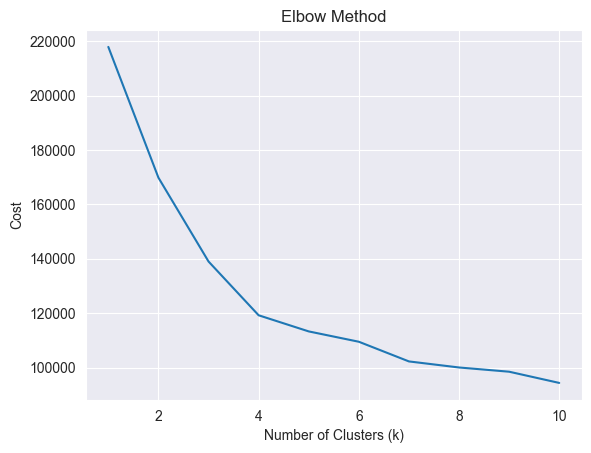

In [67]:
# Plot the cost against the number of clusters to identify the elbow
plt.plot(range(1,11), cost)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.show()

In [77]:
#Silhouette method to find optimal number of cluster for a sample of the dataset
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

#Encoding the data
df_simple = df.sample(frac=0.01, random_state=42)
label_encoder = LabelEncoder()
df_simple['Item Name'] = label_encoder.fit_transform(df_simple['Item Name'])
df_simple['Category Name'] = label_encoder.fit_transform(df_simple['Category Name'])


silhouette_scores = []

for k in range(2, 11):  #range 2 to 10 
    k_proto = KPrototypes(n_clusters = k, init='Cao', max_iter=50, n_jobs=-1, verbose=0)
    clusters = k_proto.fit_predict(df_simple.values, categorical=[0, 1])
    silhouette_scores.append(silhouette_score(df_simple.values, clusters))

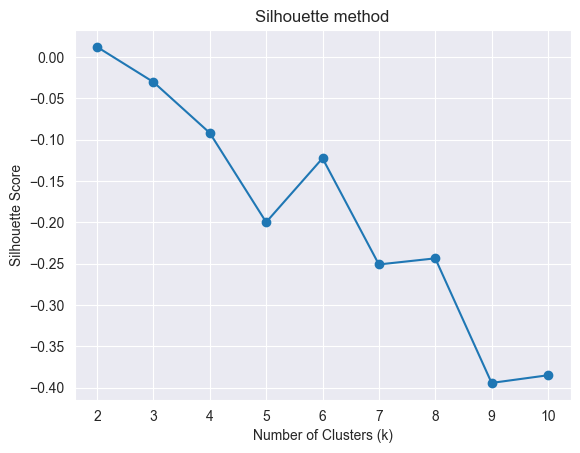

In [78]:
# Plot the silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette method')
plt.show()

In [83]:
#Based on the observations from the elbow method and silhouette method , optimal number of clusters could be taken as 6
model = KPrototypes(n_clusters = 6, init='Cao', max_iter=50, n_jobs=-1, verbose=0)
predictions = model.fit_predict(df_sample, categorical = [0,1])

In [84]:
#Creating a column called clusters in the main dataset
df_sample['Cluster'] = predictions

In [85]:
df_sample

,Item Name,Category Name,Quantity Sold (kilo),Cluster
402545,spinach,flower,0.4,2
221348,honghu lotus root powder,aquatic,1.0,0
135138,garden chrysanthemum,flower,0.3,4
119863,apricot bao mushroom,mushroom,0.2,5
67385,yunnan lettuces,flower,0.3,2
...,...,...,...,...
259178,dongmenkou xiaobaicai,flower,0.5,2
365838,xixia mushroom,mushroom,0.2,5
131932,spinach,flower,0.5,2
671155,green and red jian pepper mix,capsicum,1.0,0


In [90]:
#Scatter Plot requires encoded categorical data
label_encoder = LabelEncoder()
df_sample['Item Name'] = label_encoder.fit_transform(df_sample['Item Name'])
df_sample['Category Name'] = label_encoder.fit_transform(df_sample['Category Name'])

In [91]:
c1 = df_sample[df_sample['Cluster']==0] #Rows that were assigned to the cluster 0
c2 = df_sample[df_sample['Cluster']==1] #Rows that were assigned to the cluster 1
c3 = df_sample[df_sample['Cluster']==2] #Rows that were assigned to the cluster 2
c4 = df_sample[df_sample['Cluster']==3]
c5 = df_sample[df_sample['Cluster']==4]
c6 = df_sample[df_sample['Cluster']==5]

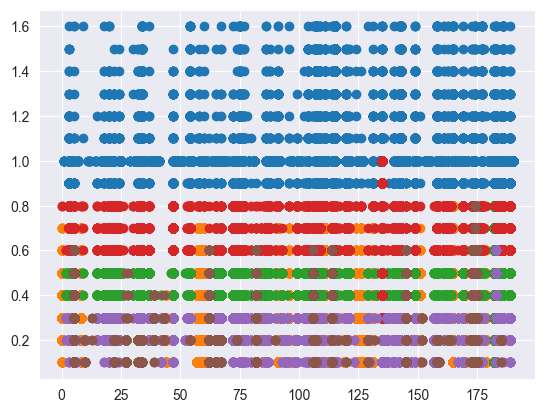

In [95]:
#Only for two features
plt.scatter(c1['Item Name'], c1['Quantity Sold (kilo)'])
plt.scatter(c2['Item Name'], c2['Quantity Sold (kilo)'])
plt.scatter(c3['Item Name'], c3['Quantity Sold (kilo)'])
plt.scatter(c4['Item Name'], c4['Quantity Sold (kilo)'])
plt.scatter(c5['Item Name'], c5['Quantity Sold (kilo)'])
plt.scatter(c6['Item Name'], c6['Quantity Sold (kilo)'])

C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\TUF\Desktop\Project\venv\Lib\site-packages\seaborn\axisgrid.p

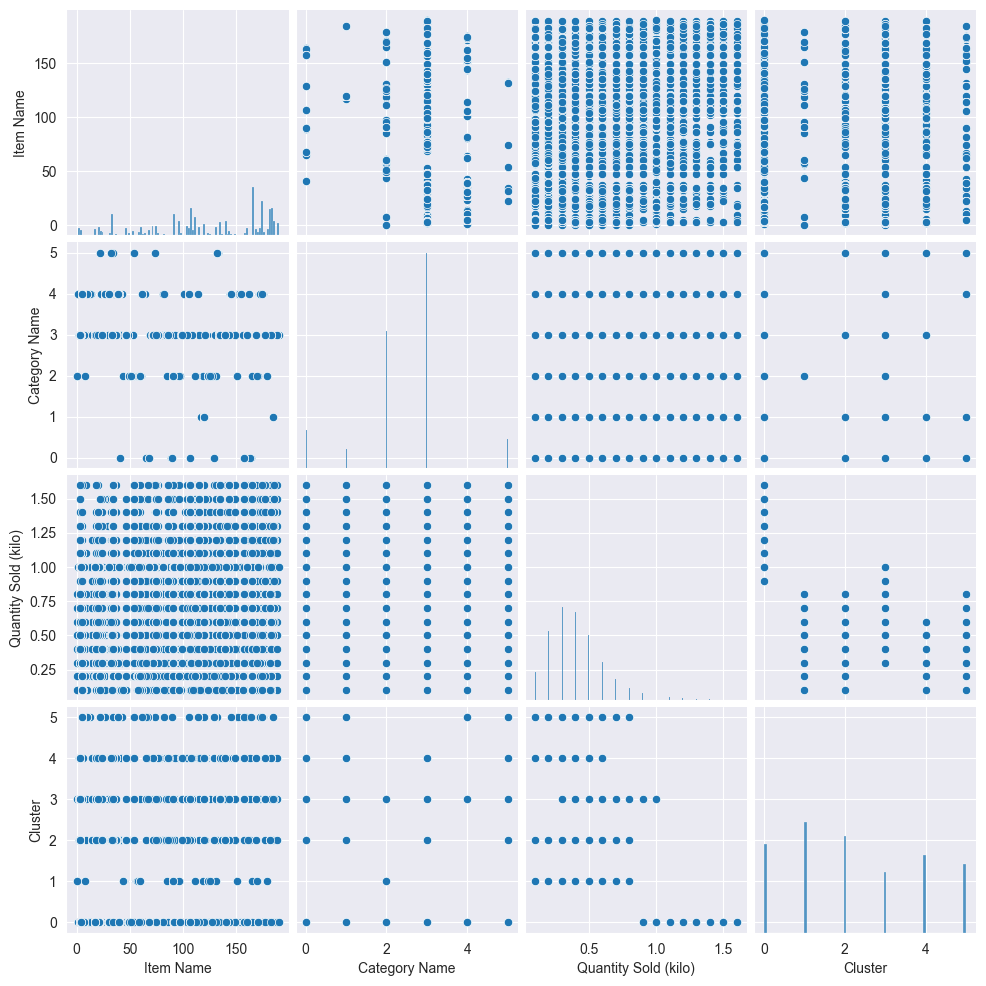

In [100]:
import seaborn as sns
sns.pairplot(df_sample, hue=None, palette='viridis')
plt.show()

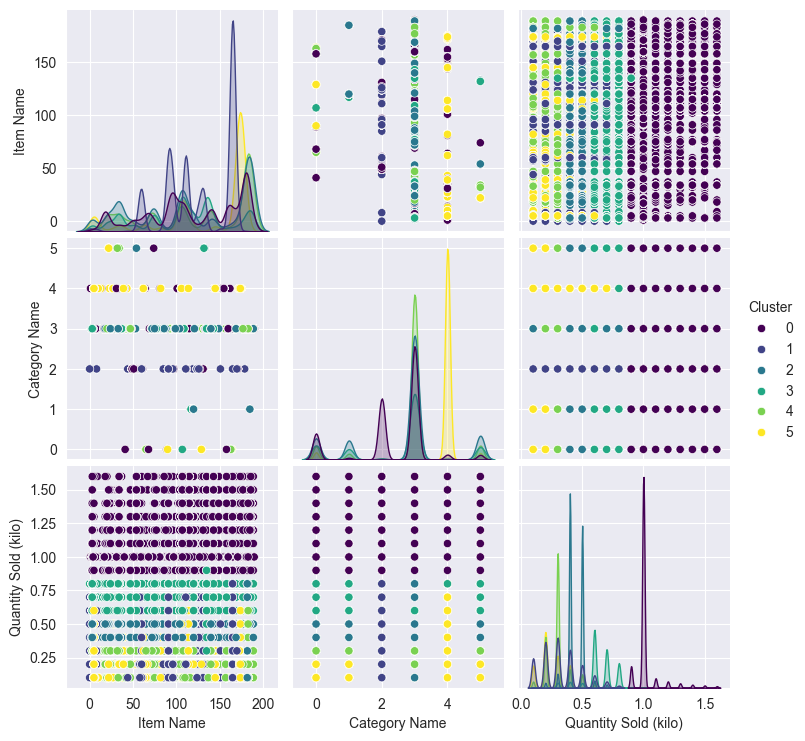

In [104]:
import seaborn as sns
df_sample['Cluster'] = model.labels_
sns.pairplot(df_sample, hue='Cluster', palette='viridis')
plt.show()

In [105]:
#Saving the model
import joblib
joblib.dump(model, "customer segmentation")

['customer segmentation']